1) Mise en place de l’environnement de code

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

Numpy

In [2]:
np.random.seed(0)
X = np.random.rand(1000)*3

In [3]:
round(np.mean(X), 2)

1.49

In [4]:
round(np.std(X), 2)

0.87

In [5]:
round(np.median(X), 2)

1.44

In [6]:
np.random.seed(0)
X_bis = np.random.rand(1000)*3

In [7]:
round(np.mean(X_bis), 2)

1.49

In [8]:
round(np.std(X_bis), 2)

0.87

In [9]:
round(np.median(X_bis), 2)

1.44

In [10]:
noise = np.random.randn(1000)
Y = np.sin(X) + noise * 0.1

Matplotlib

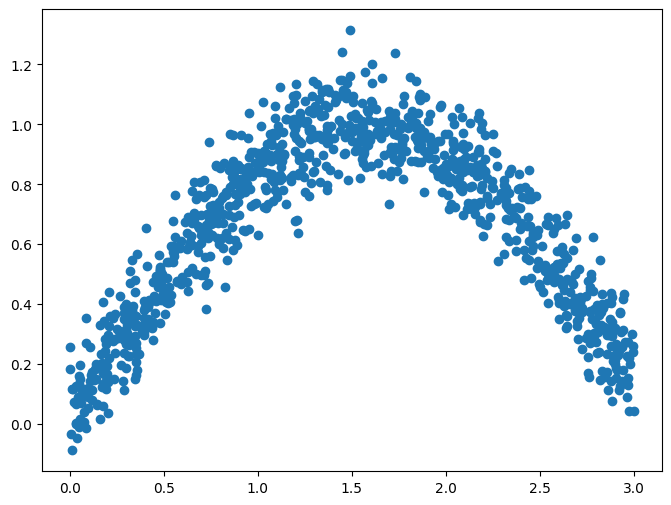

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(X, Y)
plt.show()

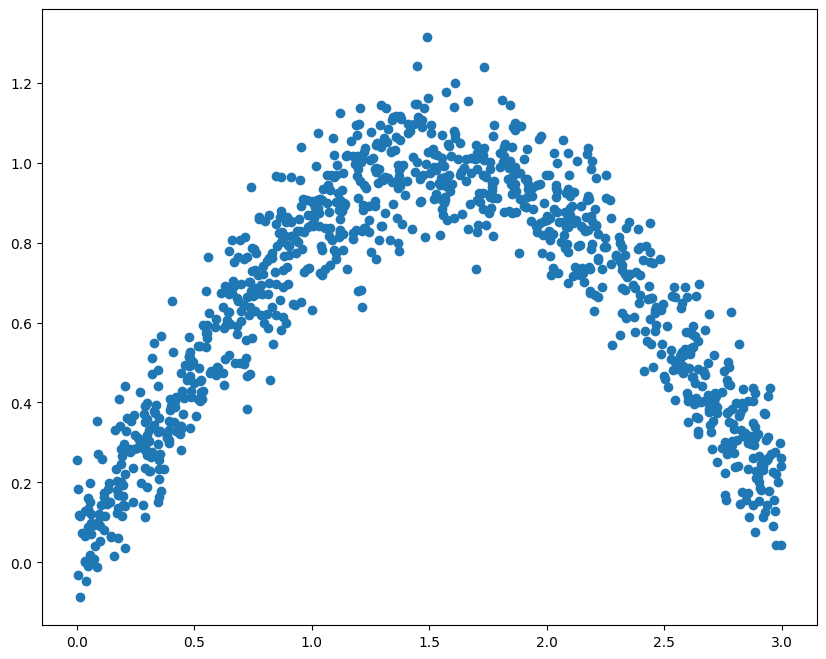

In [12]:
plt.figure(figsize = (10,8))
plt.scatter(X, Y)
plt.show()

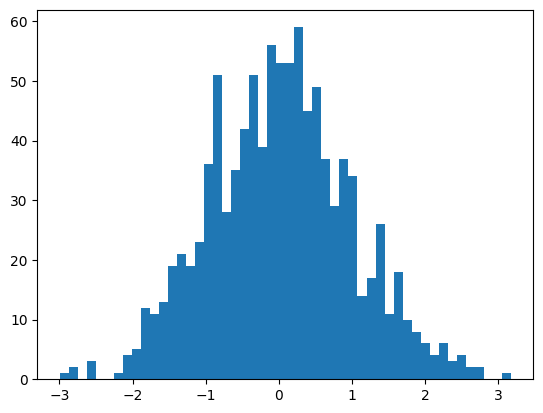

In [13]:
plt.hist(noise, bins=50)
plt.show()

2) Données

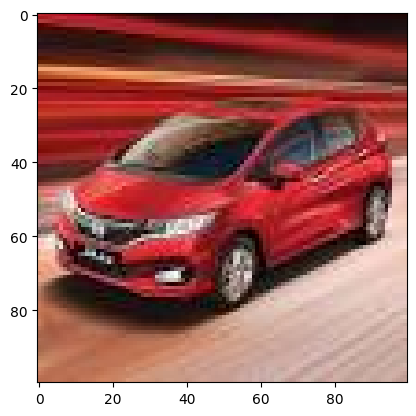

In [14]:
image = img.imread("computer_vision_tp1\data1\car\Car (1).jpeg")
plt.imshow(image)
plt.show()

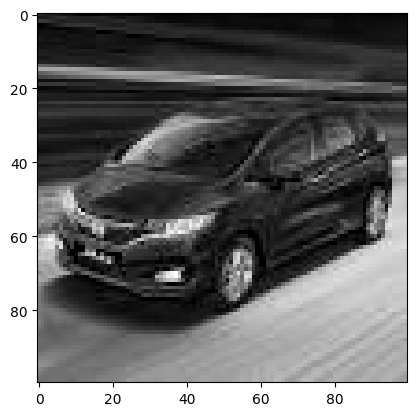

In [15]:
plt.imshow(image[:,:,1], cmap="gray")
plt.show()

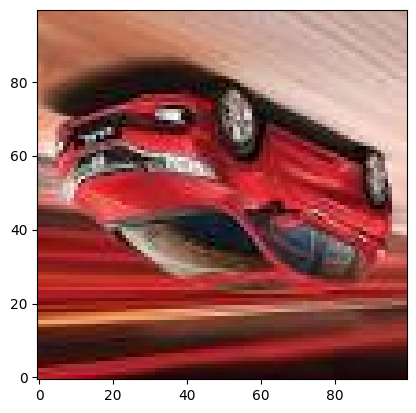

In [16]:
plt.imshow(image, origin='lower')
plt.show()

In [17]:
bike_folder = "computer_vision_tp1\data1\\bike"
car_folder = "computer_vision_tp1\data1\car"
target_size = (224,224)

In [18]:
def peuplate_images_and_labels_lists(image_folder_path):
    images= []
    labels = []
    for filename in os.listdir(image_folder_path):
        image = cv2.imread(os.path.join(image_folder_path, filename))
        image = cv2.resize(image, target_size)
        images.append(image)
        labels.append(filename.split(" ")[0])
    return images, labels

In [19]:
images_bike, labels_bike = peuplate_images_and_labels_lists(bike_folder)
images_car, labels_car = peuplate_images_and_labels_lists(car_folder)

In [20]:
images = np.array(images_bike + images_car)
labels = np.array(labels_bike + labels_car)

In [21]:
images = np.array([image.flatten() for image in images])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

3) Modèles de classification
Arbre de décision

In [23]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
clf.predict([X_test[0]])

array(['Bike'], dtype='<U4')

Support Vector Machine (SVM)

In [25]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [26]:
svm.predict([X_test[0]])

array(['Bike'], dtype='<U4')

Accuracy

In [27]:
accuracy_model1 = accuracy_score(y_test, clf.predict(X_test))
print(accuracy_model1)

0.9293478260869565


In [28]:

accuracy_model2 = accuracy_score(y_test, svm.predict(X_test))
print(accuracy_model2)

0.9402173913043478


Matrice de confusion

In [29]:
confusionmatrix1 = confusion_matrix(y_test, clf.predict(X_test))
print(confusionmatrix1)

[[82  5]
 [ 8 89]]


In [30]:
confusionmatrix2 = confusion_matrix(y_test, svm.predict(X_test), labels=['Car', 'Bike'])
print(confusionmatrix2)

[[91  6]
 [ 5 82]]


4) Comparaison de pipeline et fine tuning
modèle 1

In [31]:
print(clf.get_depth())

7


In [32]:
max_depth_list = list(range(1, 13))
train_accuracy = []
test_accuracy = []

for max_depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_accuracy.append(accuracy_score(y_test, test_predictions))

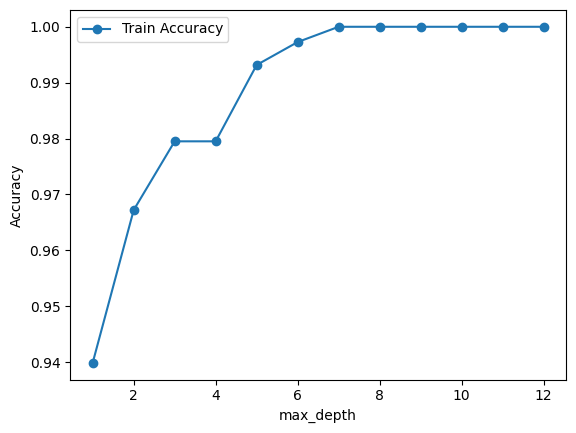

In [33]:
plt.plot(max_depth_list, train_accuracy, label='Train Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

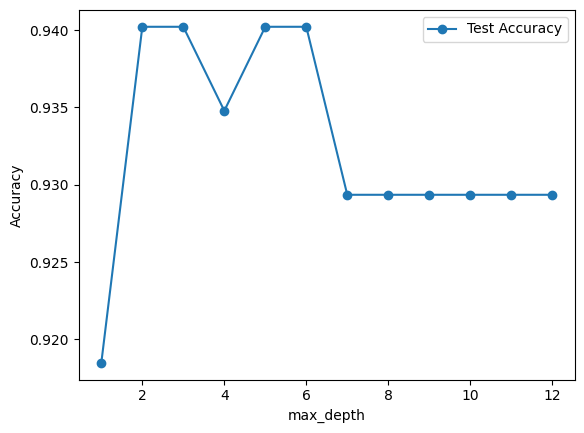

In [34]:
plt.plot(max_depth_list, test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()